In [65]:
import plotly.graph_objects as go
import plotly.io as pio

# Define the updated HorizonAnalytics template
HorizonAnalytics = go.layout.Template(
    layout=go.Layout(
        paper_bgcolor='#0d1b2a',  # Background color
        plot_bgcolor='#0d1b2a',  # Background color
        height=800,
        width=800 * 1.618,
        xaxis=dict(
            anchor='y',
            showgrid=True,
            gridcolor='rgba(255, 255, 255, 0.2)',  # Softer grid lines for contrast
            tickfont=dict(
                size=36,  # Consistent with other elements
                family='Montserrat, sans-serif',
                color='#ffffff',
                weight="bold"
            ),
            title=dict(
                text='',
                font=dict(
                    size=48,  # Increase to match other elements
                    family='Montserrat, sans-serif',
                    color='#ffffff',
                    weight="bold"
                )
            ),
            linecolor='#ffffff',  # White axis lines for contrast
            linewidth=2
        ),
        yaxis=dict(
            anchor='x',
            showgrid=True,
            gridcolor='rgba(255, 255, 255, 0.2)',  # Softer grid lines
            tickfont=dict(
                size=36,  # Consistent with x-axis
                family='Montserrat, sans-serif',
                color='#ffffff',
                weight="bold"
            ),
            title=dict(
                text='',
                font=dict(
                    size=48,  # Increase to match x-axis
                    family='Montserrat, sans-serif',
                    color='#ffffff',
                    weight="bold"
                )
            ),
            linecolor='#ffffff',  # White axis lines
            linewidth=2
        ),
        font=dict(
            color='#ffffff',  # White font for all text
            size=36,  # Uniform font size
            family='Montserrat, sans-serif',
            weight="bold"
        ),
        # Refined colorway for better visibility and differentiation
        colorway=["#FFFF00", "#33D7FF", "#A463FF", "#FFD700", 
                  "#ff4081", "#ffc107", "#00c4a0", "#a0aec0"],
        title=dict(
            text='',
            font=dict(
                size=64,  # **Big Boost in Title Size**
                color='#ffffff',
                family='Montserrat, sans-serif',
                weight="bold"
            ),
            x=0.5,  # Center title
            y=0.97  # Push title higher
        )
    ),
    data=dict(
        scatter=[
            go.Scatter(
                line=dict(width=5)  # Increased line width for better visibility
            )
        ]
    )
)

# Register the updated HorizonAnalytics template
pio.templates['HorizonAnalytics'] = HorizonAnalytics
pio.templates.default = 'HorizonAnalytics'

In [66]:
import pandas as pd
from IPython.display import display

# Load the CSV while skipping metadata lines (first 10 rows) and using the correct delimiter
file_path = "kerg2.csv"
de_2025_election_raw = pd.read_csv(file_path, sep=";", skiprows=9, encoding="utf-8-sig")

In [67]:
import pandas as pd
from IPython.display import display

def process_election_data(df, stimme=1, gruppenname='AfD', display_table=False, sort_by="DiffProzentPkt", ascending=True):
    """
    Filters the Bundestagswahl 2025 election dataset to keep only Wahlkreis-level data
    and applies user-defined filters for Stimme and Gruppenname.
    Ensures numeric columns are converted correctly and sorts the DataFrame.

    Parameters:
    df (pd.DataFrame): The election dataset.
    stimme (int): The vote type (1 = Erststimme, 2 = Zweitstimme). Default is 1.
    gruppenname (str): The party or candidate to filter for. Default is 'AfD'.
    display_table (bool): If True, displays the DataFrame as a scrollable table. Default is False.
    sort_by (str): Column name to sort by. Default is 'DiffProzentPkt'.
    ascending (bool): Sorting order (True for ascending, False for descending). Default is True.

    Returns:
    pd.DataFrame: A filtered and sorted DataFrame ready for mapping.
    """
    filtered_df = df[
        (df["Gebietsart"] == "Wahlkreis") &  # Keep only Wahlkreis level (most granular)
        (df["Gruppenart"] != "System-Gruppe") &  # Exclude system-level statistics
        (df["Stimme"] == stimme) &  # Filter by Erststimme or Zweitstimme
        (df["Gruppenname"] == gruppenname)  # Filter by party or candidate name
    ].copy()

    # Ensure Gebietsnummer is a string (matches GeoJSON format)
    filtered_df["Gebietsnummer"] = filtered_df["Gebietsnummer"].astype(str)

    # Convert numeric columns to float, handling comma decimal separators
    for col in ["DiffProzent", "DiffProzentPkt", "Prozent"]:
        filtered_df[col] = (
            filtered_df[col]
            .astype(str)  # Ensure it's string for replacements
            .str.replace(",", ".", regex=False)  # Replace European comma decimal
            .astype(float)  # Convert to float
        )

    # Sort by the specified column and reset index
    filtered_df = filtered_df.sort_values(by=sort_by, ascending=ascending).reset_index(drop=True)

    # Optionally display the filtered DataFrame as a scrollable table
    if display_table:
        display(filtered_df.style.set_sticky())

    return filtered_df

# Example usage
de_2025_election = process_election_data(de_2025_election_raw, stimme=2, gruppenname='AfD', sort_by="Prozent", display_table=False)

In [68]:
import geopandas as gpd

# Define paths
shapefile_path = "wahlkreise/btw25_geometrie_wahlkreise_shp_geo.shp"
geojson_output_path = "wahlkreise/btw25_wahlkreise_2025.geojson"

# Load the generalized Shapefile
wahlkreis_gdf = gpd.read_file(shapefile_path)

# Convert to GeoJSON and save (small simplification for performance)
wahlkreis_gdf["geometry"] = wahlkreis_gdf["geometry"].simplify(tolerance=0.0005, preserve_topology=True)
wahlkreis_gdf.to_file(geojson_output_path, driver="GeoJSON")

print(f"Generalized GeoJSON saved at: {geojson_output_path}")

Generalized GeoJSON saved at: wahlkreise/btw25_wahlkreise_2025.geojson


In [69]:
import json

# Load the new GeoJSON
with open(geojson_output_path, "r", encoding="utf-8") as file:
    wahlkreis_geojson = json.load(file)

# Print the first feature to see its structure
# print(json.dumps(wahlkreis_geojson["features"][0], indent=2))

### Germany

In [70]:
# import plotly.express as px
# import os

# # Define output folder path
# output_folder = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte/map_frames"

# # Ensure the directory exists
# os.makedirs(output_folder, exist_ok=True)

# # Ensure Prozent is numeric
# de_2025_election["Prozent"] = (
#     de_2025_election["Prozent"]
#     .astype(str)
#     .str.replace(",", ".", regex=False)  # Convert European decimal format
#     .astype(float)
# )

# # Sort data from least to most AfD support
# de_2025_election = de_2025_election.sort_values(by="Prozent", ascending=True).reset_index(drop=True)

# # Iterate over rows, adding one Wahlkreis at a time
# for i in range(1, len(de_2025_election) + 1):
#     # Select subset of rows up to the current index
#     subset = de_2025_election.iloc[:i]

#     # Create the map
#     fig = px.choropleth_mapbox(
#         subset,
#         geojson=wahlkreis_geojson,
#         locations="Gebietsnummer",
#         featureidkey="properties.WKR_NR",
#         color="Prozent",
#         color_continuous_scale="Blues",
#         range_color=[0, de_2025_election["Prozent"].max()],
#         mapbox_style="white-bg",
#         zoom=5,
#         center={"lat": 51.1657, "lon": 10.4515},
#         opacity=0.7,
#     )

#     # Minimalist settings
#     fig.update_layout(
#         title="",  
#         margin=dict(l=0, r=0, t=0, b=0),  
#         showlegend=False,  
#     )

#     # Save the figure as a PNG file
#     frame_filename = os.path.join(output_folder, f"frame_{i:04d}.png")  # Format: frame_0001.png
    
#     # Debugging: Print filename before saving
#     print(f"Attempting to save: {frame_filename}")

#     try:
#         fig.write_image(frame_filename, scale=2)
#         print(f"✅ Saved {frame_filename}")
#     except Exception as e:
#         print(f"❌ Error saving {frame_filename}: {e}")

# print("All frames saved successfully!")

In [71]:
# import plotly.express as px
# import os
# import pandas as pd

# # Define output folder path
# output_folder = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte/map_frames"

# # Ensure the directory exists
# os.makedirs(output_folder, exist_ok=True)

# # Create a DataFrame where every Wahlkreis has the same value (1)
# all_wahlkreise = pd.DataFrame({
#     "Gebietsnummer": de_2025_election["Gebietsnummer"].unique(),
#     "Prozent": [1] * len(de_2025_election)  # Assign all Wahlkreise the value 1
# })

# # Create the transparent base map
# fig = px.choropleth_mapbox(
#     all_wahlkreise,
#     geojson=wahlkreis_geojson,
#     locations="Gebietsnummer",
#     featureidkey="properties.WKR_NR",
#     color="Prozent",
#     color_continuous_scale=[(0, "rgba(0,0,0,0)"), (1, "rgba(0,0,0,0)")],  # Fully transparent
#     range_color=[0, 1],  # Dummy range
#     mapbox_style="white-bg",
#     zoom=5,  # Must match the zoom from the time series
#     center={"lat": 51.1657, "lon": 10.4515},  # Ensure it matches the series
#     opacity=1.0,  # Ensures transparency applies correctly
# )

# # Keep borders visible
# fig.update_traces(marker=dict(line=dict(width=1, color="black")))

# # Hide legend and make background transparent
# fig.update_layout(
#     showlegend=False,
#     coloraxis_showscale=False,  # Hide color scale
#     paper_bgcolor="rgba(0,0,0,0)",  # Fully transparent background
#     plot_bgcolor="rgba(0,0,0,0)",  # Fully transparent plot area
#     margin=dict(l=0, r=0, t=0, b=0),  # Remove margins
# )

# # Save the transparent base map with the same resolution and format as the series
# base_filename = os.path.join(output_folder, "transparent_base.png")
# fig.write_image(base_filename, scale=2, width=1920, height=1080)  # Ensuring consistency

# print(f"✅ Saved transparent base map: {base_filename}")

/var/folders/r0/4vr5j1517ggd5nvq86w27hhm0000gn/T/ipykernel_14671/2273131284.py:25: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



✅ Saved final frame: /Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte/final_frame.png


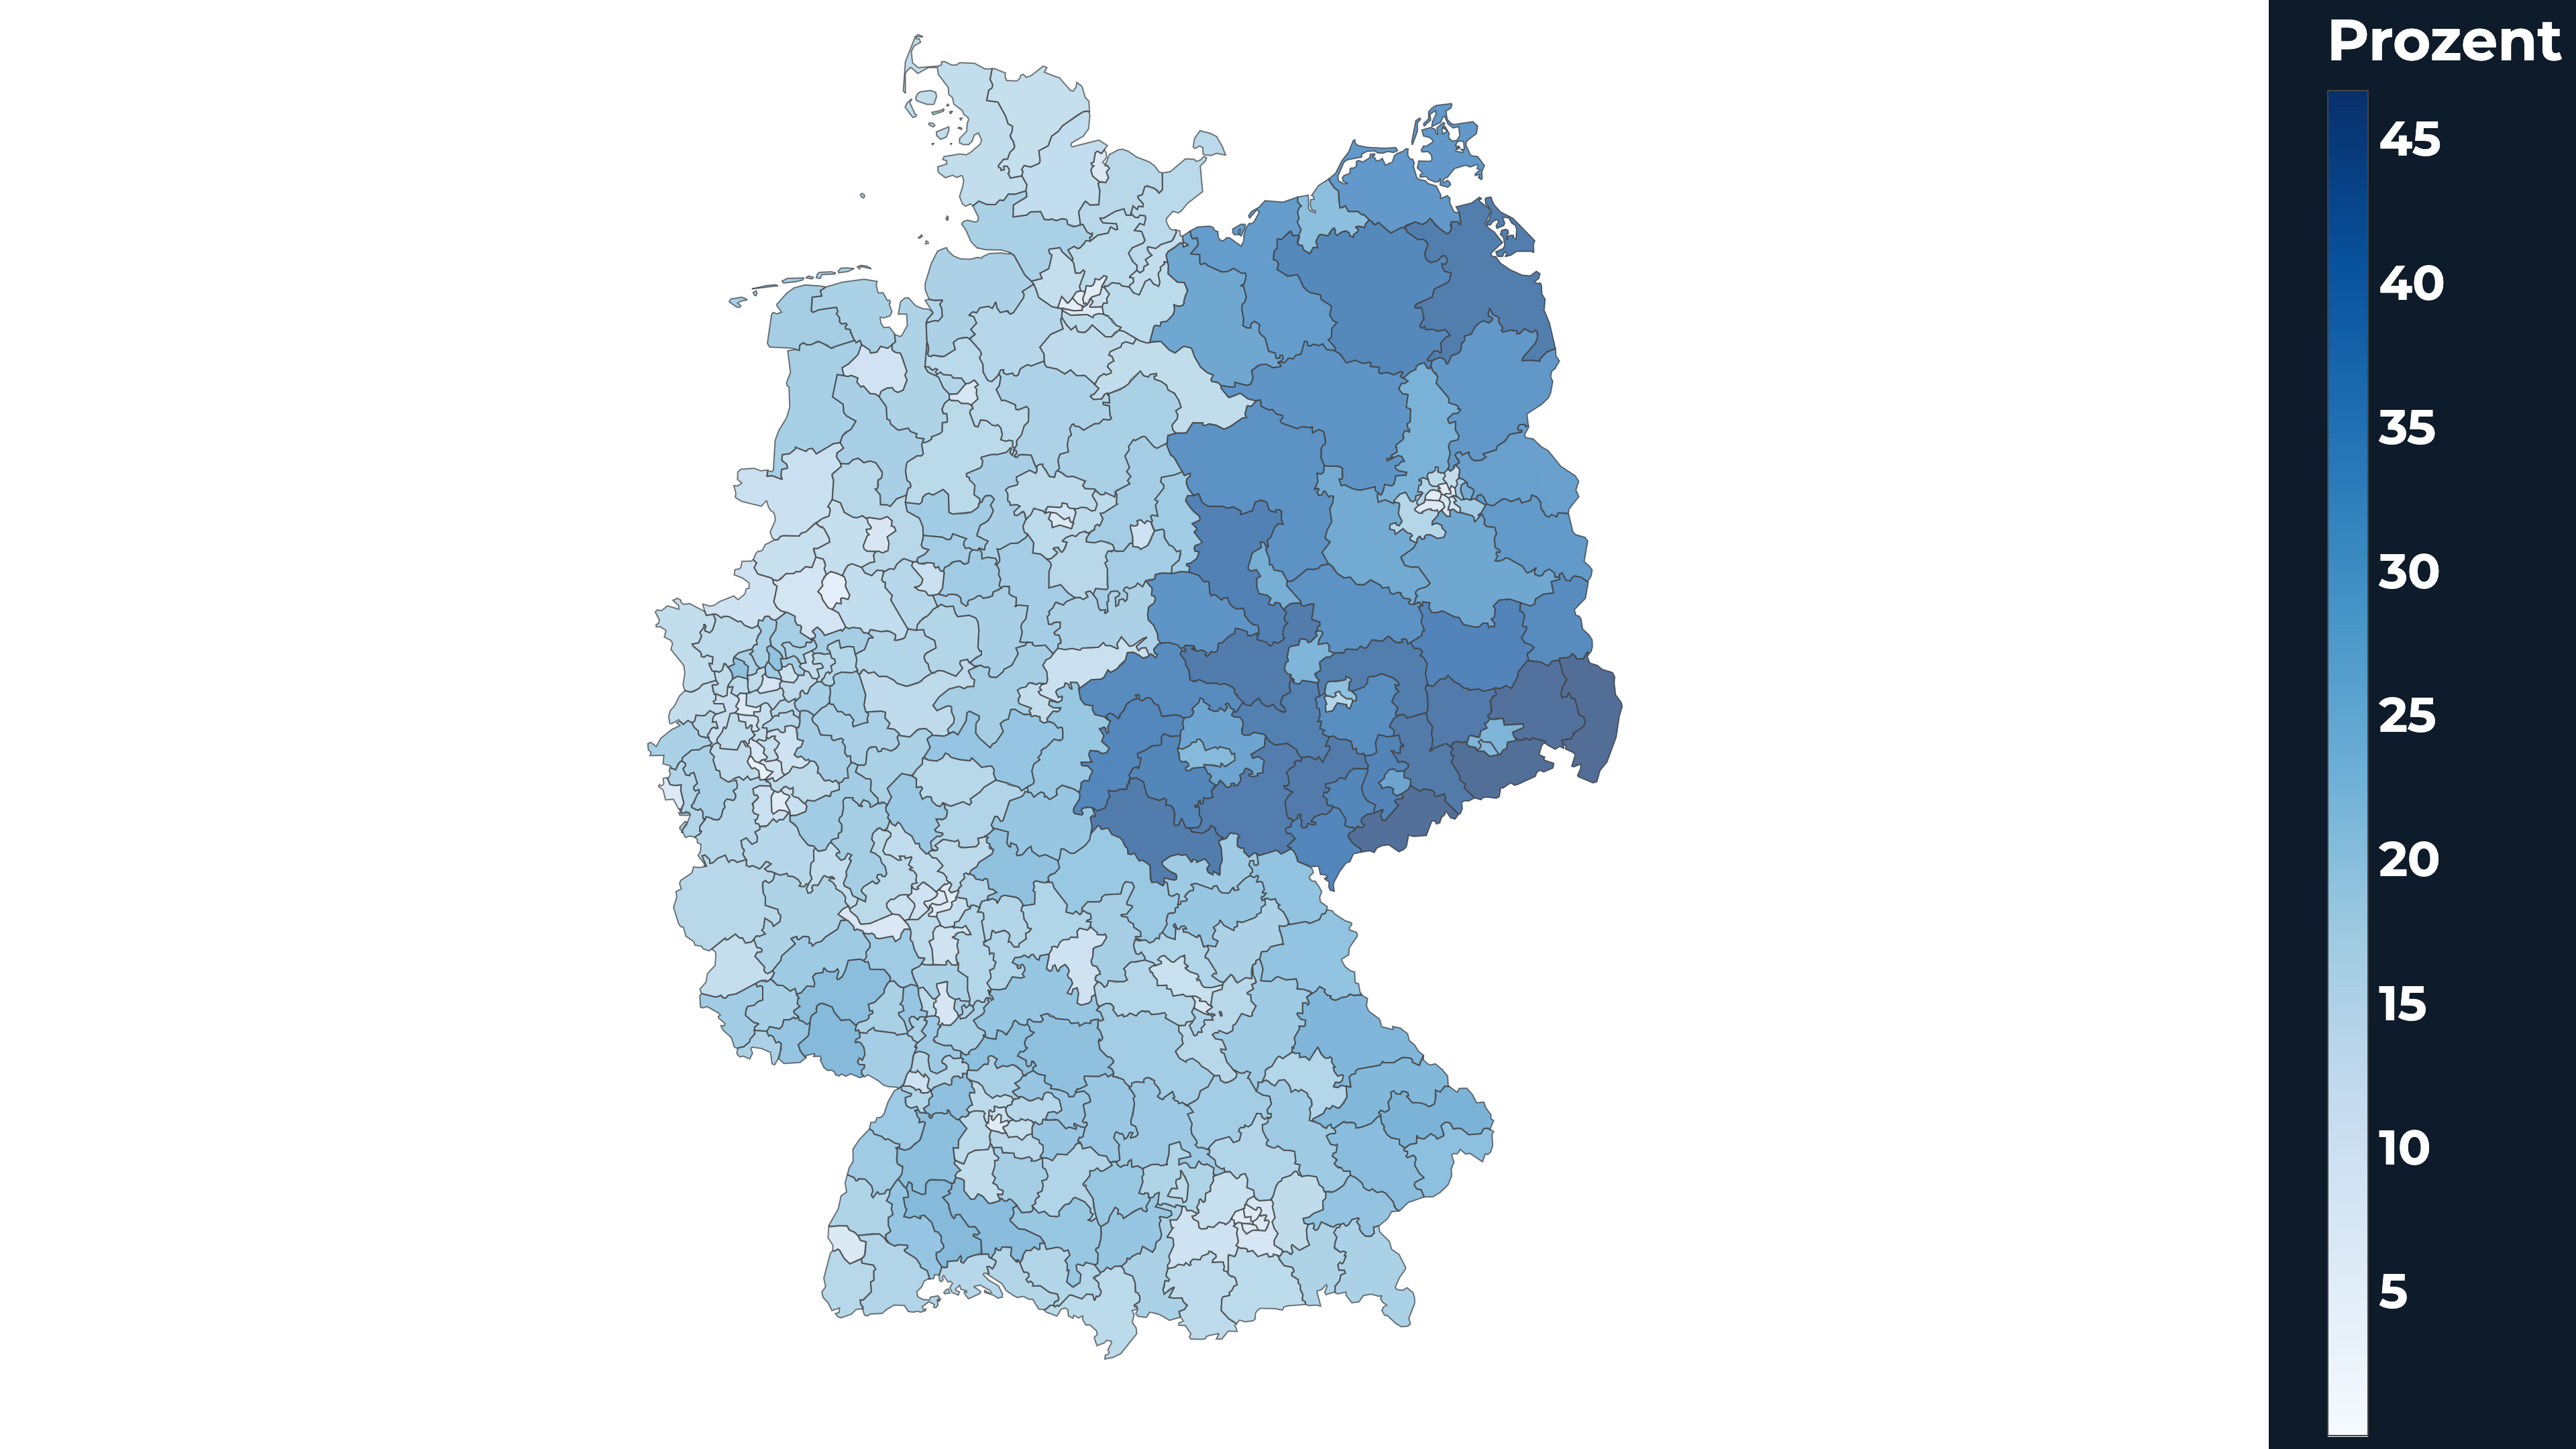

In [84]:
import plotly.express as px
import os
from PIL import Image
import IPython.display as display

# Define output folder path
output_folder = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte"
os.makedirs(output_folder, exist_ok=True)  # Ensure the directory exists

# Ensure Prozent is numeric
de_2025_election["Prozent"] = (
    de_2025_election["Prozent"]
    .astype(str)
    .str.replace(",", ".", regex=False)  # Convert European decimal format
    .astype(float)
)

# Sort data from least to most AfD support
de_2025_election = de_2025_election.sort_values(by="Prozent", ascending=True).reset_index(drop=True)

# Use the full dataset (last frame)
subset = de_2025_election.copy()

# Create the map (1920x1080 resolution)
fig = px.choropleth_mapbox(
    subset,
    geojson=wahlkreis_geojson,
    locations="Gebietsnummer",
    featureidkey="properties.WKR_NR",
    color="Prozent",
    color_continuous_scale="Blues",
    range_color=[0, de_2025_election["Prozent"].max()],
    mapbox_style="white-bg",
    zoom=5.8,
    center={"lat": 51.1657, "lon": 10.4515},
    opacity=0.7,
)

# Minimalist settings
fig.update_layout(
    title="",  
    margin=dict(l=0, r=0, t=0, b=0),  
    showlegend=False,  
    width=1920,  # Set width
    height=1080  # Set height
)

# Save the figure as a PNG file
last_frame_filename = os.path.join(output_folder, "final_frame.png")
fig.write_image(last_frame_filename, scale=2)

print(f"✅ Saved final frame: {last_frame_filename}")

# Display the image in Jupyter Notebook
img = Image.open(last_frame_filename)
display.display(img)

## Berlin

In [72]:
# import plotly.express as px
# import os

# # Define output folder path for Berlin-specific frames
# output_folder = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte/map_frames_berlin"

# # Ensure the directory exists
# os.makedirs(output_folder, exist_ok=True)

# # Ensure Prozent is numeric
# de_2025_election["Prozent"] = (
#     de_2025_election["Prozent"]
#     .astype(str)
#     .str.replace(",", ".", regex=False)  # Convert European decimal format
#     .astype(float)
# )

# # Sort data from least to most AfD support
# de_2025_election = de_2025_election.sort_values(by="Prozent", ascending=True).reset_index(drop=True)

# # Iterate over all Wahlkreise in order
# for i in range(1, len(de_2025_election) + 1):
#     # Select subset of rows up to the current index
#     subset = de_2025_election.iloc[:i].copy()

#     # Set all non-Berlin Wahlkreise (not 75-85) to NaN for transparency
#     # subset.loc[~subset["Gebietsnummer"].astype(int).between(74, 85), "Prozent"] = None

#     # Create the map (Zoomed into Berlin, only Wahlkreise 75-85 colored)
#     fig = px.choropleth_mapbox(
#         subset,
#         geojson=wahlkreis_geojson,
#         locations="Gebietsnummer",
#         featureidkey="properties.WKR_NR",
#         color="Prozent",
#         color_continuous_scale="Blues",
#         range_color=[0, de_2025_election["Prozent"].max()],
#         mapbox_style="white-bg",
#         zoom=10,  # Closer zoom into Berlin
#         center={"lat": 52.52, "lon": 13.405},  # Berlin center
#         opacity=0.7,
#     )

#     # Keep borders visible for all Wahlkreise (including transparent ones)
#     fig.update_traces(marker=dict(line=dict(width=1, color="black")))

#     # Hide legend, keep transparent background
#     fig.update_layout(
#         title="",  
#         margin=dict(l=0, r=0, t=0, b=0),  
#         showlegend=False,  
#         coloraxis_showscale=False,  
#         paper_bgcolor="rgba(0,0,0,0)",  # Fully transparent background
#         plot_bgcolor="rgba(0,0,0,0)",  # Fully transparent plot area
#     )

#     # Save the figure as a PNG file
#     frame_filename = os.path.join(output_folder, f"frame_{i:04d}.png")  # Format: frame_0001.png
    
#     # Debugging: Print filename before saving
#     print(f"Attempting to save: {frame_filename}")

#     try:
#         fig.write_image(frame_filename, scale=2)
#         print(f"✅ Saved {frame_filename}")
#     except Exception as e:
#         print(f"❌ Error saving {frame_filename}: {e}")

# print("All Berlin frames saved successfully!")

## München

In [73]:
# import plotly.express as px
# import os

# # Define output folder path for Munich-specific frames
# output_folder = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte/map_frames_munich"

# # Ensure the directory exists
# os.makedirs(output_folder, exist_ok=True)

# # Ensure Prozent is numeric
# de_2025_election["Prozent"] = (
#     de_2025_election["Prozent"]
#     .astype(str)
#     .str.replace(",", ".", regex=False)  # Convert European decimal format
#     .astype(float)
# )

# # Sort data from least to most AfD support
# de_2025_election = de_2025_election.sort_values(by="Prozent", ascending=True).reset_index(drop=True)

# # Iterate over all Wahlkreise in order
# for i in range(1, len(de_2025_election) + 1):
#     # Select subset of rows up to the current index
#     subset = de_2025_election.iloc[:i].copy()

#     # Set all non-Munich Wahlkreise (not 216-219) to NaN for transparency
#     # subset.loc[~subset["Gebietsnummer"].astype(int).between(216, 219), "Prozent"] = None

#     # Create the map (Zoomed into Munich, only Wahlkreise 216-219 colored)
#     fig = px.choropleth_map(
#         subset,
#         geojson=wahlkreis_geojson,
#         locations="Gebietsnummer",
#         featureidkey="properties.WKR_NR",
#         color="Prozent",
#         color_continuous_scale="Blues",
#         range_color=[0, de_2025_election["Prozent"].max()],
#         map_style="white-bg",
#         zoom=10,  # Closer zoom into Munich
#         center={"lat": 48.137, "lon": 11.575},  # Munich center
#         opacity=0.7,
#     )

#     # Keep borders visible for all Wahlkreise (including transparent ones)
#     fig.update_traces(marker=dict(line=dict(width=1, color="black")))

#     # Hide legend, keep transparent background
#     fig.update_layout(
#         title="",  
#         margin=dict(l=0, r=0, t=0, b=0),  
#         showlegend=False,  
#         coloraxis_showscale=False,  
#         paper_bgcolor="rgba(0,0,0,0)",  # Fully transparent background
#         plot_bgcolor="rgba(0,0,0,0)",  # Fully transparent plot area
#     )

#     # Save the figure as a PNG file
#     frame_filename = os.path.join(output_folder, f"frame_{i:04d}.png")  # Format: frame_0001.png
    
#     # Debugging: Print filename before saving
#     print(f"Attempting to save: {frame_filename}")

#     try:
#         fig.write_image(frame_filename, scale=2)
#         print(f"✅ Saved {frame_filename}")
#     except Exception as e:
#         print(f"❌ Error saving {frame_filename}: {e}")

# print("All Munich frames saved successfully!")

## Ruhr

In [74]:
# import plotly.express as px
# import os

# # Define output folder path for Ruhr-specific frames
# output_folder = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte/map_frames_ruhr"

# # Ensure the directory exists
# os.makedirs(output_folder, exist_ok=True)

# # Ensure Prozent is numeric
# de_2025_election["Prozent"] = (
#     de_2025_election["Prozent"]
#     .astype(str)
#     .str.replace(",", ".", regex=False)  # Convert European decimal format
#     .astype(float)
# )

# # Define the list of Ruhr Wahlkreise
# ruhr_wahlkreise = list(range(104, 106)) + [109] + list(range(112, 123)) + [124] + list(range(137, 145)) + [149]

# # Sort data from least to most AfD support
# de_2025_election = de_2025_election.sort_values(by="Prozent", ascending=True).reset_index(drop=True)

# # Iterate over all Wahlkreise in order
# for i in range(1, len(de_2025_election) + 1):
#     # Select subset of rows up to the current index
#     subset = de_2025_election.iloc[:i].copy()

#     # Set all non-Ruhr Wahlkreise to NaN for transparency
#     # subset.loc[~subset["Gebietsnummer"].astype(int).isin(ruhr_wahlkreise), "Prozent"] = None

#     # Create the map (Zoomed into Ruhr, only selected Wahlkreise colored)
#     fig = px.choropleth_map(
#         subset,
#         geojson=wahlkreis_geojson,
#         locations="Gebietsnummer",
#         featureidkey="properties.WKR_NR",
#         color="Prozent",
#         color_continuous_scale="Blues",
#         range_color=[0, de_2025_election["Prozent"].max()],
#         map_style="white-bg",
#         zoom=8,  # Wider zoom to cover Ruhr area
#         center={"lat": 51.5, "lon": 7.4},  # Ruhr Metropolis center
#         opacity=0.7,
#     )

#     # Keep borders visible for all Wahlkreise (including transparent ones)
#     fig.update_traces(marker=dict(line=dict(width=1, color="black")))

#     # Hide legend, keep transparent background
#     fig.update_layout(
#         title="",  
#         margin=dict(l=0, r=0, t=0, b=0),  
#         showlegend=False,  
#         coloraxis_showscale=False,  
#         paper_bgcolor="rgba(0,0,0,0)",  # Fully transparent background
#         plot_bgcolor="rgba(0,0,0,0)",  # Fully transparent plot area
#     )

#     # Save the figure as a PNG file
#     frame_filename = os.path.join(output_folder, f"frame_{i:04d}.png")  # Format: frame_0001.png
    
#     # Debugging: Print filename before saving
#     print(f"Attempting to save: {frame_filename}")

#     try:
#         fig.write_image(frame_filename, scale=2)
#         print(f"✅ Saved {frame_filename}")
#     except Exception as e:
#         print(f"❌ Error saving {frame_filename}: {e}")

# print("All Ruhr Metropolis frames saved successfully!")

## Gebietsname

In [87]:
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Directories
base_dir = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte"
output_dir = os.path.join(base_dir, "map_name_frames")  # Folder for name frames

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to convert a percentage value to a color using the Blues colormap
def get_map_color(value, vmin, vmax, colormap="Blues"):
    """
    Maps a percentage value to a color using a given colormap.
    """
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.get_cmap(colormap)
    rgba = cmap(norm(value))  # Get RGBA values
    return tuple(int(c * 255) for c in rgba[:3])  # Convert to RGB (ignore alpha)

# Function to generate name frames for each Wahlkreis in de_2025_election
def generate_wahlkreis_name_frames(df, height=720, width=1280, 
                                   output_dir=output_dir, font_size=51, 
                                   font_type="ExtraBold", font_outline_width=3, 
                                   top_margin=50):
    """
    Generates PNG frames for each Wahlkreis in de_2025_election using shortened 'Gebietsname' as text in uppercase,
    colored according to the map, with dynamic outline color (black if <30%, white if ≥30%).
    
    Parameters:
        df (pd.DataFrame): The de_2025_election dataframe.
        height (int): Image height in pixels.
        width (int): Image width in pixels.
        output_dir (str): Folder to save output frames.
        font_size (int): Size of the text font.
        font_type (str): Font weight (e.g., "Regular", "Bold", "ExtraBold").
        font_outline_width (int): Thickness of text outline.
        top_margin (int): Vertical space from the top edge to the text.
    """
    # Sort Wahlkreise by AfD support (ascending)
    df_sorted = df.sort_values("Prozent", ascending=True).reset_index(drop=True)

    # Find min and max Prozent for scaling colors
    vmin, vmax = df_sorted["Prozent"].min(), df_sorted["Prozent"].max()

    # Shorten Wahlkreis names by extracting the rightmost part after a hyphen
    def shorten_name(name):
        if " – " in name:  # Check for the correct long dash with spaces
            return name.split(" – ")[-1].strip()
        return name.strip()

    # Convert names to uppercase after shortening and extract corresponding colors
    gebiets_labels = [shorten_name(name).upper() for name in df_sorted["Gebietsname"].tolist()]
    color_map = [get_map_color(value, vmin, vmax) for value in df_sorted["Prozent"].tolist()]

    # Define Montserrat font path
    font_path = os.path.join("..", "Montserrat", f"Montserrat-{font_type}.ttf")

    # Try to load the selected font, fallback to default if missing
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        print(f"Montserrat font '{font_type}' not found. Using default font.")
        font = ImageFont.load_default()

    # Generate a frame for each Wahlkreis name (one per row in sorted dataframe)
    for frame_index, (gebietsname, text_color, value) in enumerate(zip(gebiets_labels, color_map, df_sorted["Prozent"]), start=1):
        # Determine outline color based on Prozent value
        font_outline_color = (0, 0, 0) if value < 30 else (255, 255, 255)  # Black if <30, White if ≥30

        # Create an empty image with transparent background
        img = Image.new("RGBA", (width, height), color=(0, 0, 0, 0))
        draw = ImageDraw.Draw(img)

        # Get text size
        text_bbox = draw.textbbox((0, 0), gebietsname, font=font)
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]

        # Calculate top-aligned position
        text_position = ((width - text_width) // 2, top_margin)  # Keep centered horizontally, align to top

        # Add outline effect
        if font_outline_width > 0:
            for dx in range(-font_outline_width, font_outline_width + 1):
                for dy in range(-font_outline_width, font_outline_width + 1):
                    if dx != 0 or dy != 0:  # Skip center position
                        draw.text((text_position[0] + dx, text_position[1] + dy), gebietsname, font=font, fill=font_outline_color)

        # Draw the main text using its mapped color
        draw.text(text_position, gebietsname, font=font, fill=text_color)

        # Construct file name (e.g., 0001.png, 0002.png)
        file_name = f"{frame_index:06d}.png"
        file_path = os.path.join(output_dir, file_name)

        # Save the image
        img.save(file_path, "PNG")

        print(f"✅ Saved frame for: {gebietsname} → {file_name} (Color: {text_color}, Outline: {font_outline_color})")

    print(f"✅ Name frames saved in: {output_dir}")

# Run the function using de_2025_election with top-aligned text and dynamic outline colors
generate_wahlkreis_name_frames(de_2025_election, height=720, width=1280, 
                               font_size=51, font_type="ExtraBold", 
                               font_outline_width=3, top_margin=50)

✅ Saved frame for: KÖLN II → 000001.png (Color: (247, 251, 255), Outline: (0, 0, 0))
✅ Saved frame for: MÜNSTER → 000002.png (Color: (244, 249, 254), Outline: (0, 0, 0))
✅ Saved frame for: PRENZLAUER BERG OST → 000003.png (Color: (243, 248, 253), Outline: (0, 0, 0))
✅ Saved frame for: HAMBURG-ALTONA → 000004.png (Color: (242, 247, 253), Outline: (0, 0, 0))
✅ Saved frame for: HAMBURG-EIMSBÜTTEL → 000005.png (Color: (241, 247, 253), Outline: (0, 0, 0))
✅ Saved frame for: HAMBURG-NORD → 000006.png (Color: (237, 244, 251), Outline: (0, 0, 0))
✅ Saved frame for: BERLIN-CHARLOTTENBURG → 000007.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: BERLIN-MITTE → 000008.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: BONN → 000009.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: STUTTGART I → 000010.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: MÜNCHEN-WEST/MITTE → 000011.png (Color: (234, 242, 250), Outline: (0, 0, 0))

In [86]:
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Directories
base_dir = "/Users/arya/Documents/Adobe/Premiere Pro/Horizon Analytics/2025-03 afd_karte"
output_dir = os.path.join(base_dir, "map_value_frames")  # Folder for Prozent value frames

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to convert a percentage value to a color using the Blues colormap
def get_map_color(value, vmin, vmax, colormap="Blues"):
    """
    Maps a percentage value to a color using a given colormap.
    """
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.get_cmap(colormap)
    rgba = cmap(norm(value))  # Get RGBA values
    return tuple(int(c * 255) for c in rgba[:3])  # Convert to RGB (ignore alpha)

# Function to generate frames displaying the Prozent values
def generate_wahlkreis_value_frames(df, height=720, width=1280, 
                                    output_dir=output_dir, font_size=51, 
                                    font_type="ExtraBold", font_outline_width=3, 
                                    top_margin=50):
    """
    Generates PNG frames for each Wahlkreis in de_2025_election using formatted 'Prozent' as text,
    with dynamic outline color (black if <30%, white if ≥30%).
    
    Parameters:
        df (pd.DataFrame): The de_2025_election dataframe.
        height (int): Image height in pixels.
        width (int): Image width in pixels.
        output_dir (str): Folder to save output frames.
        font_size (int): Size of the text font.
        font_type (str): Font weight (e.g., "Regular", "Bold", "ExtraBold").
        font_outline_width (int): Thickness of text outline.
        top_margin (int): Vertical space from the top edge to the text.
    """
    # Sort Wahlkreise by AfD support (ascending)
    df_sorted = df.sort_values("Prozent", ascending=True).reset_index(drop=True)

    # Find min and max Prozent for scaling colors
    vmin, vmax = df_sorted["Prozent"].min(), df_sorted["Prozent"].max()

    # Convert Prozent values to formatted string (xx.x%)
    percent_labels = [f"{value:.1f}%" for value in df_sorted["Prozent"].tolist()]
    
    # Extract corresponding colors from the Blues colormap
    color_map = [get_map_color(value, vmin, vmax) for value in df_sorted["Prozent"].tolist()]

    # Define Montserrat font path
    font_path = os.path.join("..", "Montserrat", f"Montserrat-{font_type}.ttf")

    # Try to load the selected font, fallback to default if missing
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        print(f"Montserrat font '{font_type}' not found. Using default font.")
        font = ImageFont.load_default()

    # Generate a frame for each Prozent value (one per row in sorted dataframe)
    for frame_index, (percent_text, text_color, value) in enumerate(zip(percent_labels, color_map, df_sorted["Prozent"]), start=1):
        # Determine outline color based on Prozent value
        font_outline_color = (0, 0, 0) if value < 30 else (255, 255, 255)  # Black if <30, White if ≥30

        # Create an empty image with transparent background
        img = Image.new("RGBA", (width, height), color=(0, 0, 0, 0))
        draw = ImageDraw.Draw(img)

        # Get text size
        text_bbox = draw.textbbox((0, 0), percent_text, font=font)
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]

        # Calculate top-aligned position
        text_position = ((width - text_width) // 2, top_margin)  # Keep centered horizontally, align to top

        # Add outline effect
        if font_outline_width > 0:
            for dx in range(-font_outline_width, font_outline_width + 1):
                for dy in range(-font_outline_width, font_outline_width + 1):
                    if dx != 0 or dy != 0:  # Skip center position
                        draw.text((text_position[0] + dx, text_position[1] + dy), percent_text, font=font, fill=font_outline_color)

        # Draw the main text using its mapped color
        draw.text(text_position, percent_text, font=font, fill=text_color)

        # Construct file name (e.g., 0001.png, 0002.png)
        file_name = f"{frame_index:06d}.png"
        file_path = os.path.join(output_dir, file_name)

        # Save the image
        img.save(file_path, "PNG")

        print(f"✅ Saved frame for: {percent_text} → {file_name} (Color: {text_color}, Outline: {font_outline_color})")

    print(f"✅ Prozent value frames saved in: {output_dir}")

# Run the function using de_2025_election with top-aligned text and dynamic outline colors
generate_wahlkreis_value_frames(de_2025_election, height=720, width=1280, 
                                font_size=51, font_type="ExtraBold", 
                                font_outline_width=2, top_margin=50)


✅ Saved frame for: 6.3% → 000001.png (Color: (247, 251, 255), Outline: (0, 0, 0))
✅ Saved frame for: 6.9% → 000002.png (Color: (244, 249, 254), Outline: (0, 0, 0))
✅ Saved frame for: 7.2% → 000003.png (Color: (243, 248, 253), Outline: (0, 0, 0))
✅ Saved frame for: 7.3% → 000004.png (Color: (242, 247, 253), Outline: (0, 0, 0))
✅ Saved frame for: 7.5% → 000005.png (Color: (241, 247, 253), Outline: (0, 0, 0))
✅ Saved frame for: 8.3% → 000006.png (Color: (237, 244, 251), Outline: (0, 0, 0))
✅ Saved frame for: 8.9% → 000007.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: 8.9% → 000008.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: 8.9% → 000009.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: 8.9% → 000010.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: 8.9% → 000011.png (Color: (234, 242, 250), Outline: (0, 0, 0))
✅ Saved frame for: 9.3% → 000012.png (Color: (232, 241, 250), Outline: (0, 0, 0))
✅ Saved frame fo